In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [270]:
#Read training data
df_train = pd.read_csv('train20210817v2.csv')
df_train.shape

(98072, 15)

In [ ]:
df_result = 

In [271]:
df_input1 = pd.DataFrame()  #創ㄍ空DataFrame

In [272]:
df_input1['r1']=df_train['F_1']/24000  #縮小資料 縮自0~1之間
df_input1['r2']=df_train['F_2']/31
df_input1['r3']=df_train['F_3']/31
df_input1['r4']=df_train['F_4']/31
df_input1['r5']=df_train['F_5']/31
df_input1['r6']=df_train['F_6']/31
df_input1['r7']=df_train['F_7']/31
df_input1['r8']=df_train['F_8']/31
df_input1['r9']=df_train['F_9']/31
df_input1['r10']=df_train['F_10']/31
df_input1['r11']=df_train['F_11']/31
df_input1['r12']=df_train['F_12']/31
df_input1['r13']=df_train['F_13']/31

In [273]:
df_output1=pd.DataFrame(df_train['O']/85)  # O

In [274]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

In [275]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=13))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=10, activation='relu'))
model1.add(Dense(1))

In [292]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 37,397
Trainable params: 37,397
Non-trainable params: 0
_________________________________________________________________


In [276]:
model1.compile(loss='mse', optimizer='adam')

In [277]:
X=df_input1.to_numpy()    #df_input1轉換成numpy    df_input為縮小後的數據F_1~F_13

In [278]:
y=df_output1.to_numpy()  #df_output1轉換成numpy    df_output為縮小後的數據 O

In [279]:
model1.fit(X, y, epochs=30, batch_size=1024, verbose=1)

Epoch 1/30
98072/98072 [==============================] - 2s 19us/sample - loss: 0.0574
Epoch 2/30
98072/98072 [==============================] - 1s 7us/sample - loss: 0.0246
Epoch 3/30
98072/98072 [==============================] - 1s 7us/sample - loss: 0.0231
Epoch 4/30
98072/98072 [==============================] - 1s 7us/sample - loss: 0.0216
Epoch 5/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0201
Epoch 6/30
98072/98072 [==============================] - 1s 7us/sample - loss: 0.0186
Epoch 7/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0169
Epoch 8/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0154
Epoch 9/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0145
Epoch 10/30
98072/98072 [==============================] - 1s 7us/sample - loss: 0.0135
Epoch 11/30
98072/98072 [==============================] - 1s 7us/sample - loss: 0.0125
Epoch 12/30
98072/98072 [===============

In [280]:
yhat = model1.predict(X)   #第一次預測結果  yhat

In [281]:
y.shape

(98072, 1)

In [267]:
y

array([[ 0.        ],
       [-0.00705882],
       [ 0.00705882],
       ...,
       [ 0.35058824],
       [ 0.35058824],
       [ 0.35058824]])

In [199]:
dataset=y.reshape(-1, 1)   #reshape 轉換型態   y 為 O (numpy) 正確答案

In [268]:
datase

array([[ 0.        ],
       [-0.00705882],
       [ 0.00705882],
       ...,
       [ 0.35058824],
       [ 0.35058824],
       [ 0.35058824]])

In [200]:
dataset.shape

(98072, 1)

In [201]:
dataset[0:3]

array([[ 0.        ],
       [-0.00705882],
       [ 0.00705882]])

In [296]:
def create_dataset(dataset1, dataset2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset1)-look_back-1): 
        a = dataset1[i:(i+look_back), 0]   
        dataX.append(a)                 
        dataY.append(dataset2[i + look_back, 0])
    return np.array(dataX), np.array(dataY) 

In [297]:
dataset1 = yhat   #預測
dataset2 = y      #答案

In [298]:
# reshape into X=t and Y=t+1, timestep 240
look_back = 340
allX, allY = create_dataset(dataset1, dataset2, look_back)

In [264]:
allX.shape

(97731, 340)

In [299]:
allY.shape

(97731,)

In [300]:
allX = np.reshape(allX, (allX.shape[0], 1, allX.shape[1]))   #轉換成三維  以致可以放入LSTM

In [301]:
allX

array([[[0.16123542, 0.16123542, 0.15850571, ..., 0.2752894 ,
         0.27152127, 0.27152866]],

       [[0.16123542, 0.15850571, 0.15850571, ..., 0.27152127,
         0.27152866, 0.28718755]],

       [[0.15850571, 0.15850571, 0.15850571, ..., 0.27152866,
         0.28718755, 0.28481627]],

       ...,

       [[0.18268007, 0.18268007, 0.18268007, ..., 0.14680408,
         0.14680408, 0.14680408]],

       [[0.18268007, 0.18268007, 0.18268007, ..., 0.14680408,
         0.14680408, 0.14680408]],

       [[0.18268007, 0.18268007, 0.18268007, ..., 0.14680408,
         0.14680408, 0.14680408]]], dtype=float32)

In [23]:
from tensorflow.keras.layers import LSTM

In [24]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model2 = Sequential()
model2.add(LSTM(25, input_shape=(1, look_back)))
model2.add(Dropout(0.1))
model2.add(Dense(1))

In [ ]:
model2.compile(loss='mse', optimizer='adam')

In [293]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25)                36600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 36,626
Trainable params: 36,626
Non-trainable params: 0
_________________________________________________________________


In [25]:
model2.fit(allX, allY, epochs=10, batch_size=240, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
97731/97731 [==============================] - 6s 58us/sample - loss: 0.0093
Epoch 2/10
97731/97731 [==============================] - 5s 47us/sample - loss: 0.0054
Epoch 3/10
97731/97731 [==============================] - 5s 47us/sample - loss: 0.0050
Epoch 4/10
97731/97731 [==============================] - 4s 44us/sample - loss: 0.0048
Epoch 5/10
97731/97731 [==============================] - 5s 48us/sample - loss: 0.0046
Epoch 6/10
97731/97731 [==============================] - 4s 44us/sample - loss: 0.0043
Epoch 7/10
97731/97731 [==============================] - 4s 46us/sample - loss: 0.0043
Epoch 8/10
97731/97731 [==============================] - 5s 52us/sample - loss: 0.0044
Epoch 9/10
97731/97731 [==============================] - 5s 48us/sample - loss: 0.0042
Epoch 10/10
97731/97731 [==============================] - 5s 52us/sample - loss: 0.0041


In [26]:
allPredict= model2.predict(allX)

In [27]:
allPredict

array([[0.2298903 ],
       [0.23263559],
       [0.23268616],
       ...,
       [0.16011047],
       [0.15925488],
       [0.16054407]], dtype=float32)

In [28]:
yhat

array([[0.01072643],
       [0.01072643],
       [0.00980441],
       ...,
       [0.15274876],
       [0.15274876],
       [0.15274876]], dtype=float32)

In [29]:
allPredict.shape

(97731, 1)

In [30]:
result = yhat*85

In [31]:
result.shape

(98072, 1)

In [32]:
result[look_back:len(yhat)-1, :] = allPredict*85

In [33]:
df_Ans = pd.DataFrame()
df_Ans["O"] = df_train["O"]
df_Ans["O_hat"] = result
df_Ans["yhat"] = yhat*85

In [34]:
df_Ans

,O,O_hat,yhat
0,0.0,0.911747,0.911747
1,-0.6,0.911747,0.911747
2,0.6,0.833374,0.833374
3,-0.6,0.833374,0.833374
4,-0.3,0.833374,0.833374
...,...,...,...
98067,29.8,13.686981,12.983644
98068,29.8,13.609390,12.983644
98069,29.8,13.536665,12.983644
98070,29.8,13.646246,12.983644


In [35]:
df_Ans['error'] = abs(df_Ans["O"] - df_Ans["O_hat"])  #第二個模型預測出的值與正確答案得差距
df_Ans['error2'] = abs(df_Ans["O"] - df_Ans["yhat"])  #正確答案 與第一個模型預測出的值的差距
df_Ans['error3'] = abs(df_Ans["O_hat"] - df_Ans["yhat"]) #第一與第二個模型預測出的值的差距

In [36]:
df_Ans

,O,O_hat,yhat,error,error2,error3
0,0.0,0.911747,0.911747,0.911747,0.911747,0.000000
1,-0.6,0.911747,0.911747,1.511747,1.511747,0.000000
2,0.6,0.833374,0.833374,0.233374,0.233374,0.000000
3,-0.6,0.833374,0.833374,1.433374,1.433374,0.000000
4,-0.3,0.833374,0.833374,1.133374,1.133374,0.000000
...,...,...,...,...,...,...
98067,29.8,13.686981,12.983644,16.113019,16.816356,0.703337
98068,29.8,13.609390,12.983644,16.190610,16.816356,0.625746
98069,29.8,13.536665,12.983644,16.263335,16.816356,0.553020
98070,29.8,13.646246,12.983644,16.153754,16.816356,0.662601


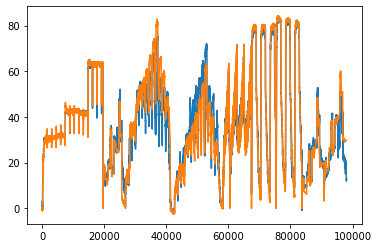

In [37]:
plt.plot(yhat*85)
plt.plot(df_train['O'])   #第一個模型預測出的值與正確答案得差距 
plt.show()

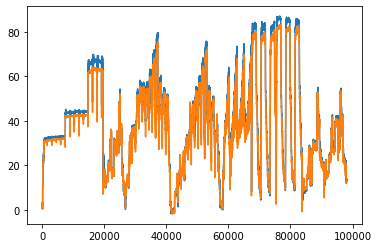

In [38]:
plt.plot(result)
plt.plot(yhat*85)   #第二個模型預測出的值與第一個模型預測的值得比較 
plt.show()

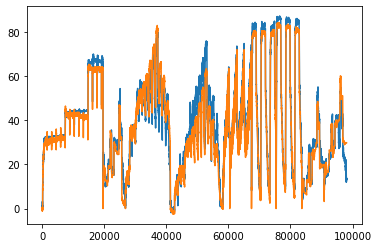

In [39]:
plt.plot(result) #第二個模型預測出的值
plt.plot(df_train['O'])  #第二個模型預測出的值與正確答案得差距
plt.show()

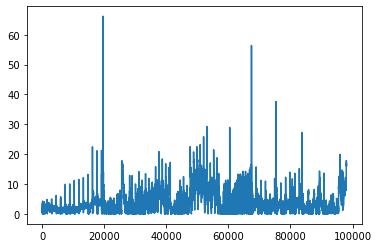

In [40]:
plt.plot(df_Ans['error'])   #正確答案 與第二個模型預測出的值的差距 df_Ans["O"] - df_Ans["O_hat"]
plt.show()

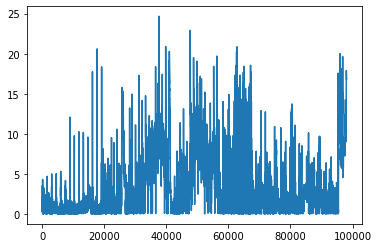

In [41]:
plt.plot(df_Ans['error2'])   #正確答案 與第一個模型預測出的值的差距 df_Ans["O"] - df_Ans["yhat"]
plt.show()

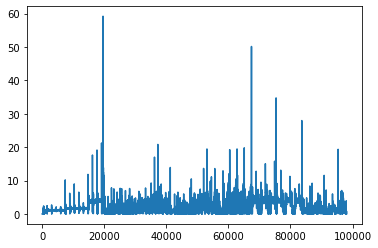

In [42]:
plt.plot(df_Ans['error3'])   #第二個與第一個模型預測出的值的差距 df_Ans["O_hat"] - df_Ans["yhat"]
plt.show()

In [43]:
y=df_Ans.error.max()

In [44]:
y

66.1787109375

In [45]:
x=df_Ans[df_Ans.error <10].count()/98072
A=x[0]*70
A

64.58469287870136

In [46]:
if y <=5:
  B = 30
elif y <=7.5:
  B = 25
elif y <=10:
  B = 20
elif y <=12.5:
  B = 17.5
elif y <=15:
  B = 15
elif y <=17.5:
  B = 10
elif y <=20:
  B = 5
elif y >20:
  B = 0
B

0

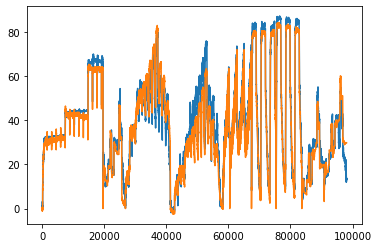

In [55]:
plt.plot(result)
# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(df_train['O'])
plt.show()

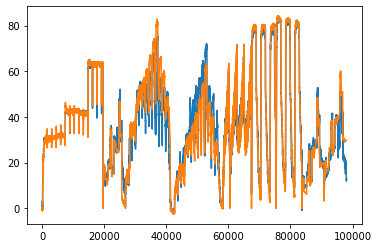

In [56]:
plt.plot(yhat*85)
# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(df_train['O'])
plt.show()

In [57]:
#比賽資料-------------------

In [129]:
#Read training data
df_test = pd.read_csv('2021test0831.csv')
df_test.shape

(7222, 14)

In [130]:
df_Test_input = pd.DataFrame()

In [131]:
df_Test_input['r1']=df_test['F_1']/24000
df_Test_input['r2']=df_test['F_2']/31
df_Test_input['r3']=df_test['F_3']/31
df_Test_input['r4']=df_test['F_4']/31
df_Test_input['r5']=df_test['F_5']/31
df_Test_input['r6']=df_test['F_6']/31
df_Test_input['r7']=df_test['F_7']/31
df_Test_input['r8']=df_test['F_8']/31
df_Test_input['r9']=df_test['F_9']/31
df_Test_input['r10']=df_test['F_10']/31
df_Test_input['r11']=df_test['F_11']/31
df_Test_input['r12']=df_test['F_12']/31
df_Test_input['r13']=df_test['F_13']/31

In [132]:
X=df_Test_input.to_numpy()

In [133]:
X

array([[0.        , 0.71935484, 0.71935484, ..., 0.70967742, 0.70645161,
        0.69677419],
       [0.        , 0.71935484, 0.71935484, ..., 0.70967742, 0.70645161,
        0.69677419],
       [0.        , 0.71935484, 0.71935484, ..., 0.70967742, 0.70645161,
        0.69677419],
       ...,
       [0.        , 0.73870968, 0.74193548, ..., 0.71935484, 0.72258065,
        0.70645161],
       [0.        , 0.73870968, 0.74193548, ..., 0.71935484, 0.71935484,
        0.70645161],
       [0.        , 0.73870968, 0.74193548, ..., 0.71935484, 0.71935484,
        0.70645161]])

In [134]:
yhat = model1.predict(X)

In [135]:
yhat.shape

(7222, 1)

In [136]:
allX, allY = create_dataset(yhat, yhat, look_back)

In [294]:
allX

array([[0.09287772, 0.09287772, 0.09997375, ..., 0.2611343 , 0.25125912,
        0.25124523],
       [0.09287772, 0.09997375, 0.09997375, ..., 0.25125912, 0.25124523,
        0.28220814],
       [0.09997375, 0.09997375, 0.09997375, ..., 0.25124523, 0.28220814,
        0.27932525],
       ...,
       [0.17959404, 0.17959404, 0.17959404, ..., 0.14805505, 0.14805505,
        0.14805505],
       [0.17959404, 0.17959404, 0.17959404, ..., 0.14805505, 0.14805505,
        0.14805505],
       [0.17959404, 0.17959404, 0.17959404, ..., 0.14805505, 0.14805505,
        0.14805505]], dtype=float32)

In [137]:
allX = np.reshape(allX, (allX.shape[0], 1, allX.shape[1]))

In [138]:
allPredict= model2.predict(allX)

In [139]:
allPredict.shape

(6881, 1)

In [140]:
# shift test predictions for plotting
#testPredictPlot = np.empty_like(yhat)
#testPredictPlot[:, :] = np.nan
#testPredictPlot[look_back:len(yhat)-1, :] = allPredict

In [141]:
#plt.plot(yhat*85)
# plot the actual price, prediction in test data=red line, actual price=blue line
#plt.plot(testPredictPlot*85)
#plt.show()

In [142]:
result = yhat

In [143]:
result[look_back:len(yhat)-1, :] = allPredict

In [144]:
result = result*85

In [145]:
result.shape

(7222, 1)

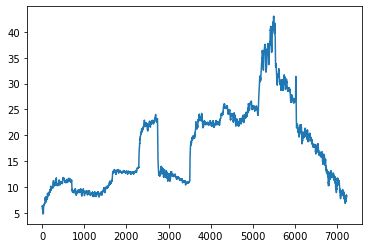

In [146]:
plt.plot(yhat*85)
plt.show()

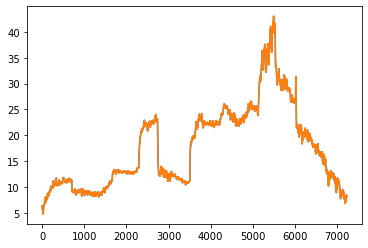

In [147]:
plt.plot(yhat*85)
plt.plot(result)
plt.show()

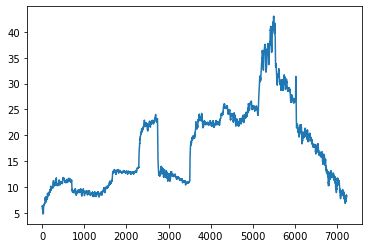

In [302]:
plt.plot(result)
plt.show()

In [148]:
result

array([[6.3105836],
       [6.3105836],
       [6.3105836],
       ...,
       [8.474035 ],
       [8.343621 ],
       [8.243959 ]], dtype=float32)

In [149]:
resultDf = pd.DataFrame()

In [150]:
df_test["O"] = result

In [152]:
resultDf = df_test

In [153]:
resultDf

,SeqNo,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,O
0,1,0,22.3,22.3,22.3,22.3,22.4,22.9,22.3,22.3,23.1,22.0,21.9,21.6,6.310584
1,2,0,22.3,22.3,22.3,22.3,22.4,22.9,22.3,22.3,23.1,22.0,21.9,21.6,6.310584
2,3,0,22.3,22.3,22.3,22.3,22.4,22.9,22.3,22.3,23.1,22.0,21.9,21.6,6.310584
3,4,0,22.3,22.3,22.3,22.3,22.4,22.9,22.3,22.3,23.1,22.0,21.9,21.6,6.310584
4,5,0,22.3,22.3,22.3,22.3,22.4,22.9,22.3,22.3,23.1,22.0,21.9,21.6,6.310584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,7218,0,22.9,23.0,23.0,23.0,23.1,23.0,23.0,22.9,24.5,22.3,22.4,21.9,8.144277
7218,7219,0,22.9,23.0,23.0,23.0,23.1,23.0,23.0,22.9,24.5,22.3,22.4,21.9,7.879897
7219,7220,0,22.9,23.0,23.0,23.0,23.1,23.0,23.0,22.9,24.5,22.3,22.4,21.9,8.474035
7220,7221,0,22.9,23.0,23.0,23.0,23.1,23.0,23.0,22.9,24.5,22.3,22.3,21.9,8.343621


In [154]:
df_test.to_csv('resultDf.csv')